In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime

# Loading csv


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.shape

(284807, 31)

# Removing duplicates if any

In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# replace very large or very small values with NaN
threshold = 1e30
df[df > threshold] = pd.NA
df[df < -threshold] = pd.NA

In [ ]:
# create a nor object
nor = MinMaxScaler()
# fit and transform the DataFrame using the scaler
df = pd.DataFrame(nor.fit_transform(df), columns=df.columns)

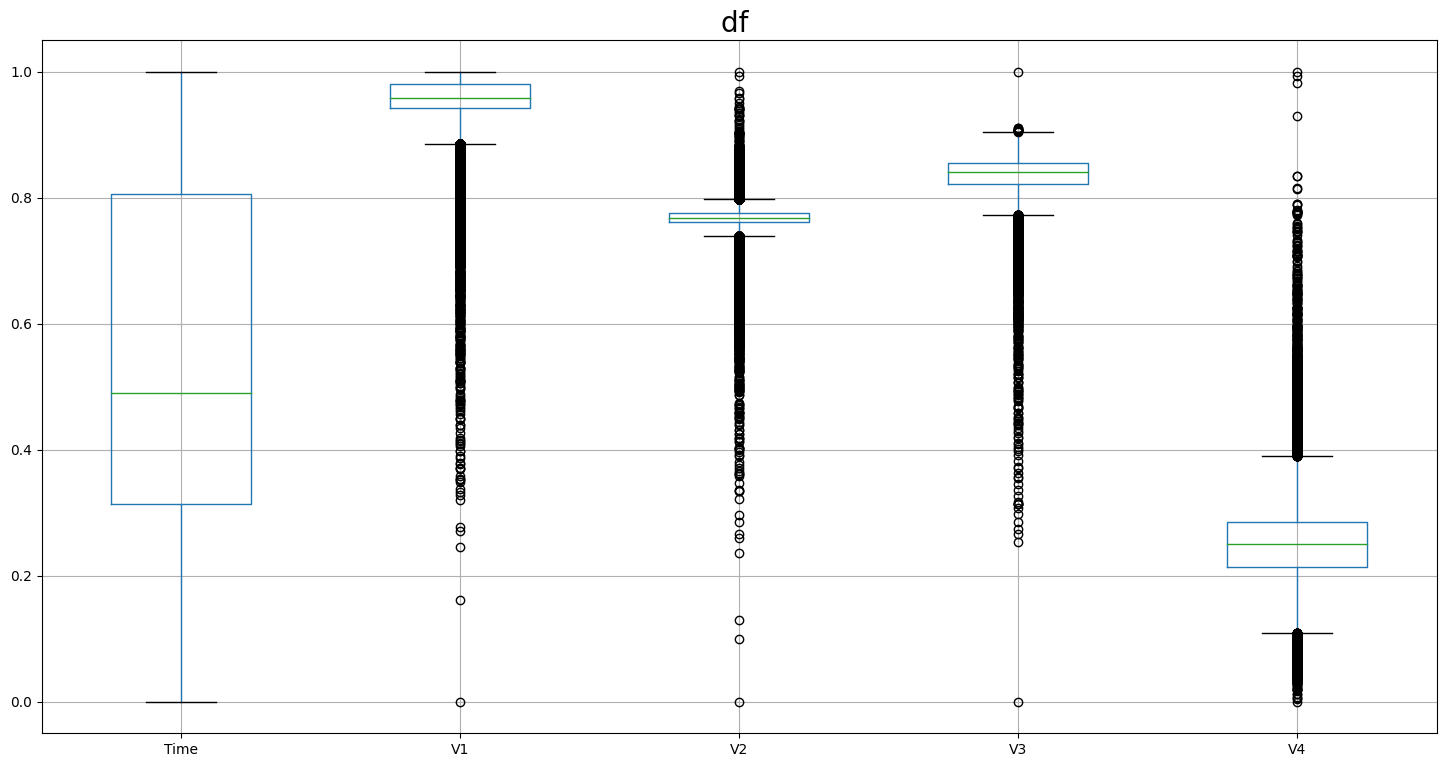

In [ ]:
#detecting outliers
cols = df.columns
plt.figure(figsize=(18,9))
df[cols[:5]].boxplot()
plt.title("df ", fontsize=20)
plt.show()

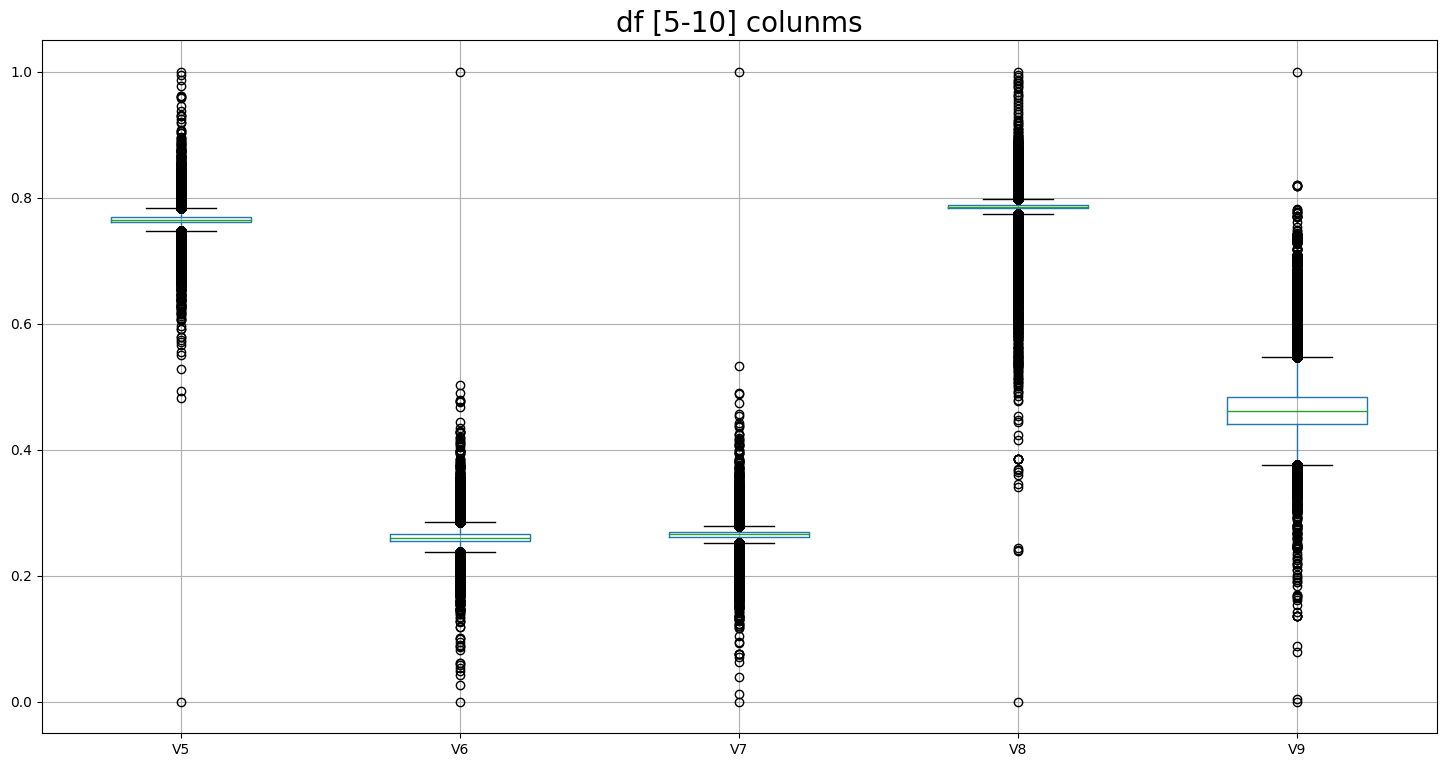

In [ ]:
plt.figure(figsize=(18,9))
df[cols[5:10]].boxplot()
plt.title("df [5-10] colunms", fontsize=20)
plt.show()

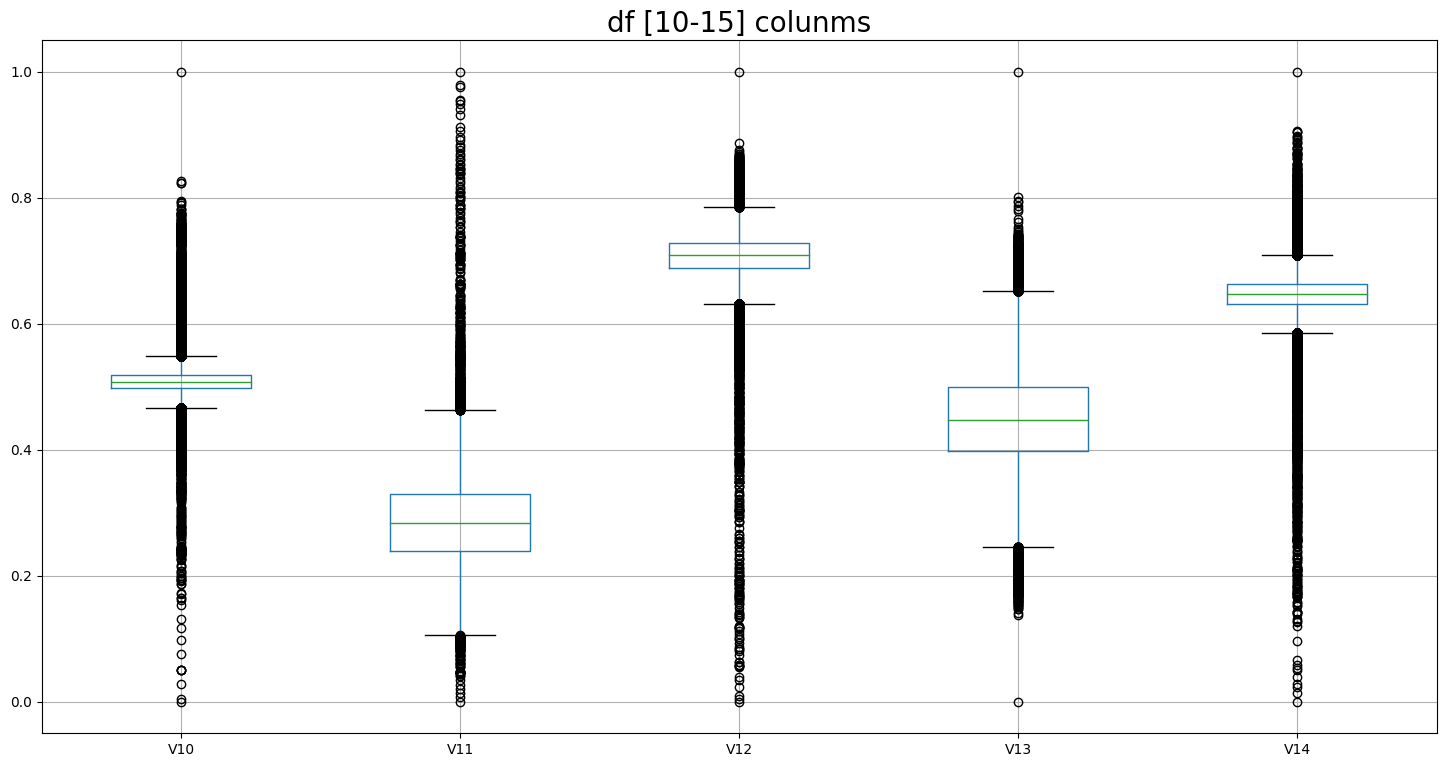

In [ ]:
plt.figure(figsize=(18,9))
df[cols[10:15]].boxplot()
plt.title("df [10-15] colunms", fontsize=20)
plt.show()

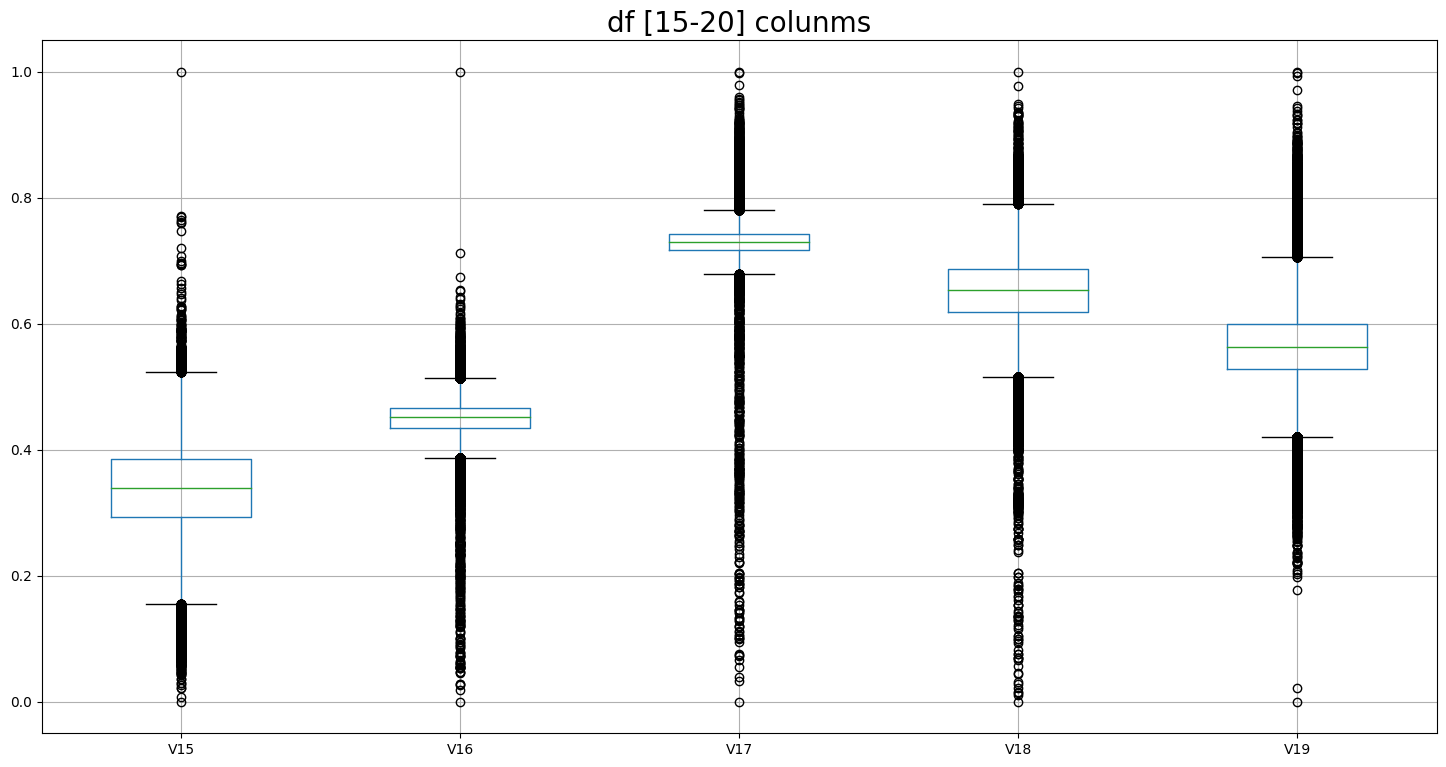

In [ ]:
plt.figure(figsize=(18,9))
df[cols[15:20]].boxplot()
plt.title("df [15-20] colunms", fontsize=20)
plt.show()

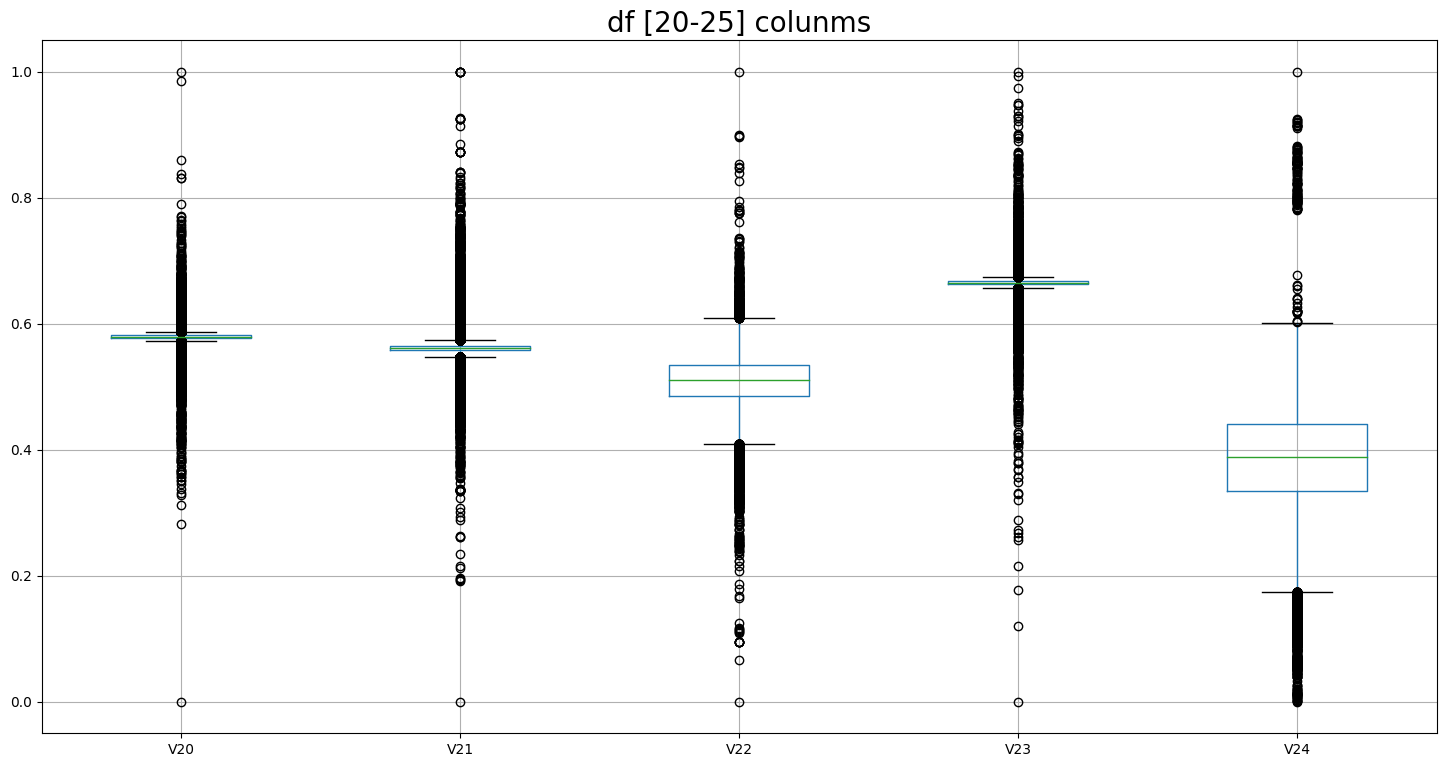

In [ ]:
plt.figure(figsize=(18,9))
df[cols[20:25]].boxplot()
plt.title("df [20-25] colunms", fontsize=20)
plt.show()

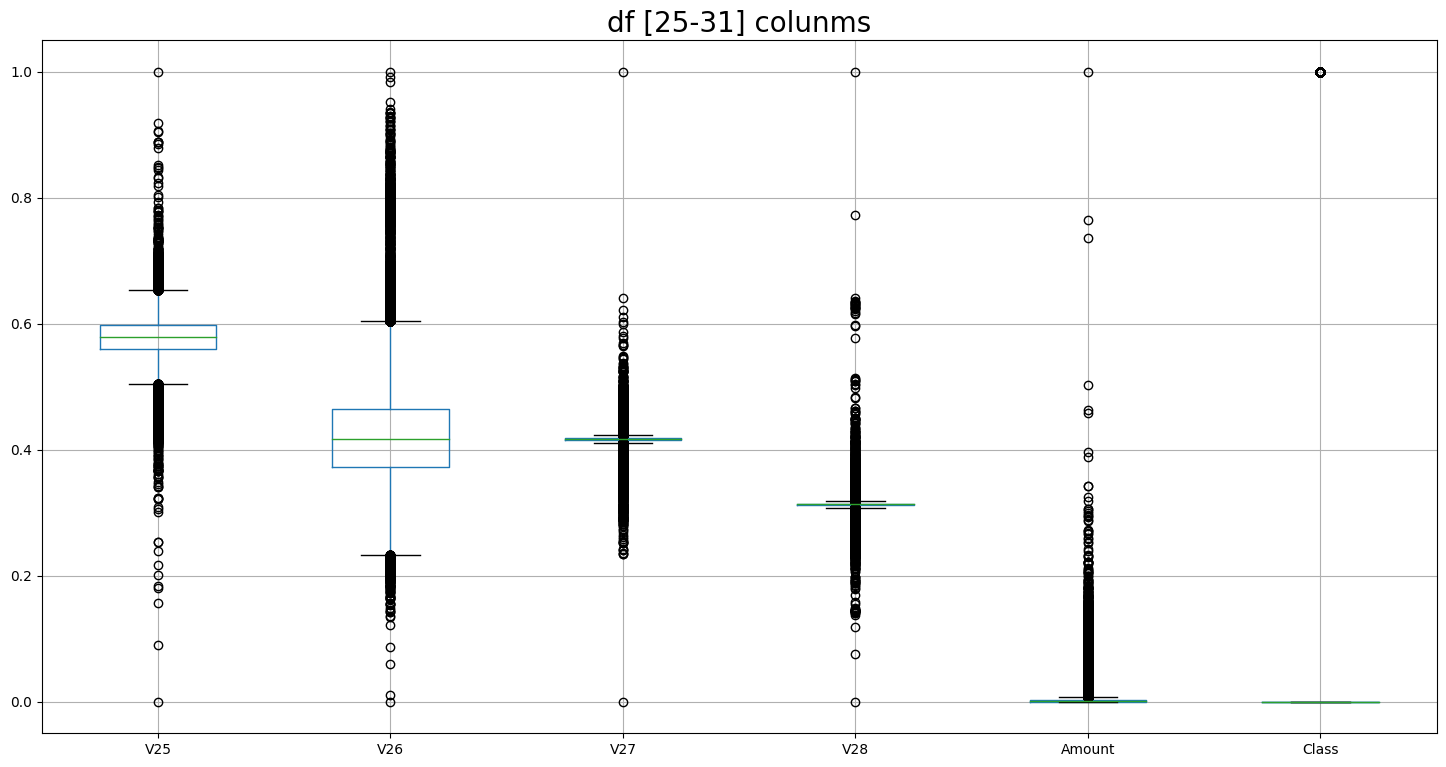

In [ ]:
plt.figure(figsize=(18,9))
df[cols[25:31]].boxplot()
plt.title("df [25-31] colunms", fontsize=20)
plt.show()

Using IQR(Inter Quartile Range) for removing outliers

In [ ]:
cols = df.columns

for col in cols:
        # calculate lower and upper quantiles
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        # calculate IQR
        iqr = q3 - q1

        # define lower and upper bounds
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        # filter DataFrame to keep only data points within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


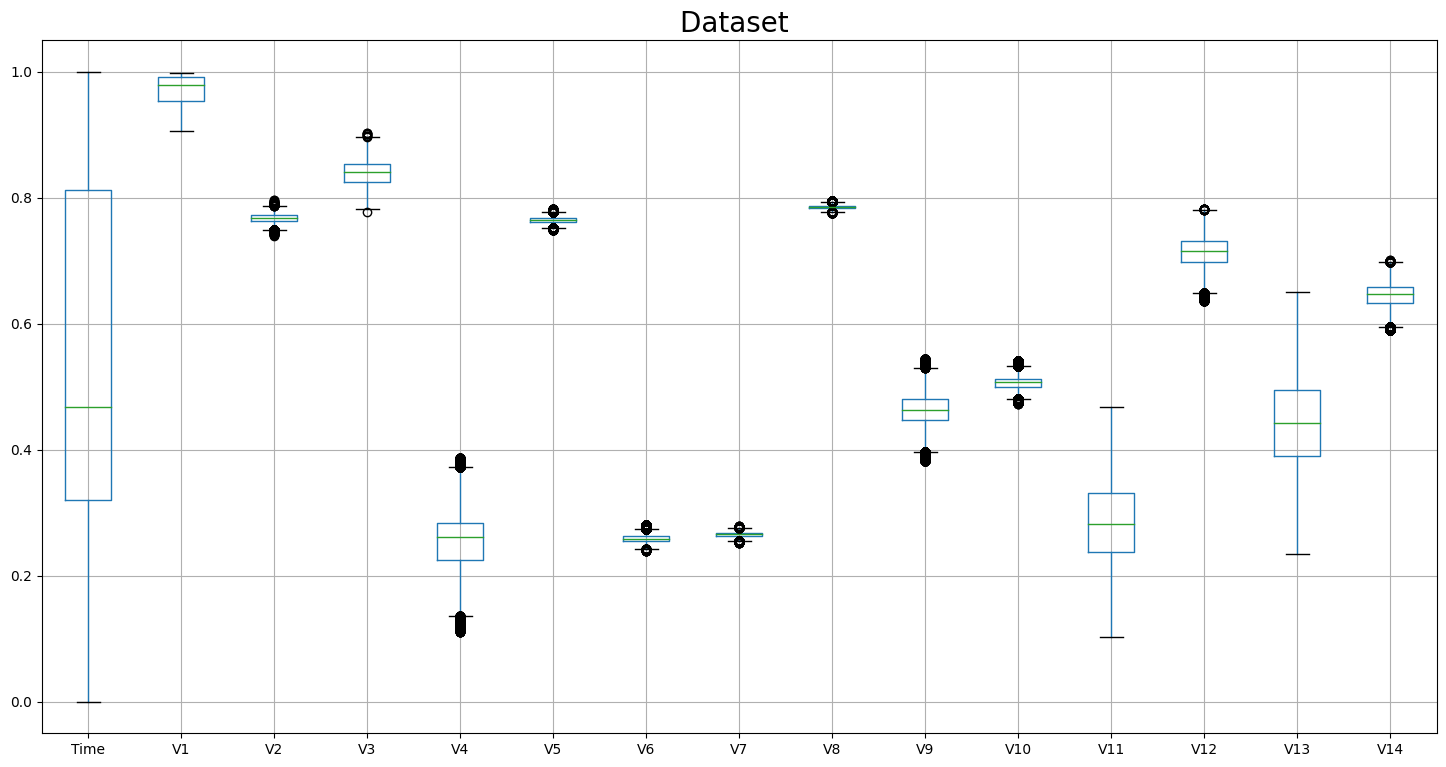

In [ ]:
#results like these
cols = df.columns
plt.figure(figsize=(18,9))
df[cols[0:15]].boxplot()
plt.title("Dataset ", fontsize=20)
plt.show()

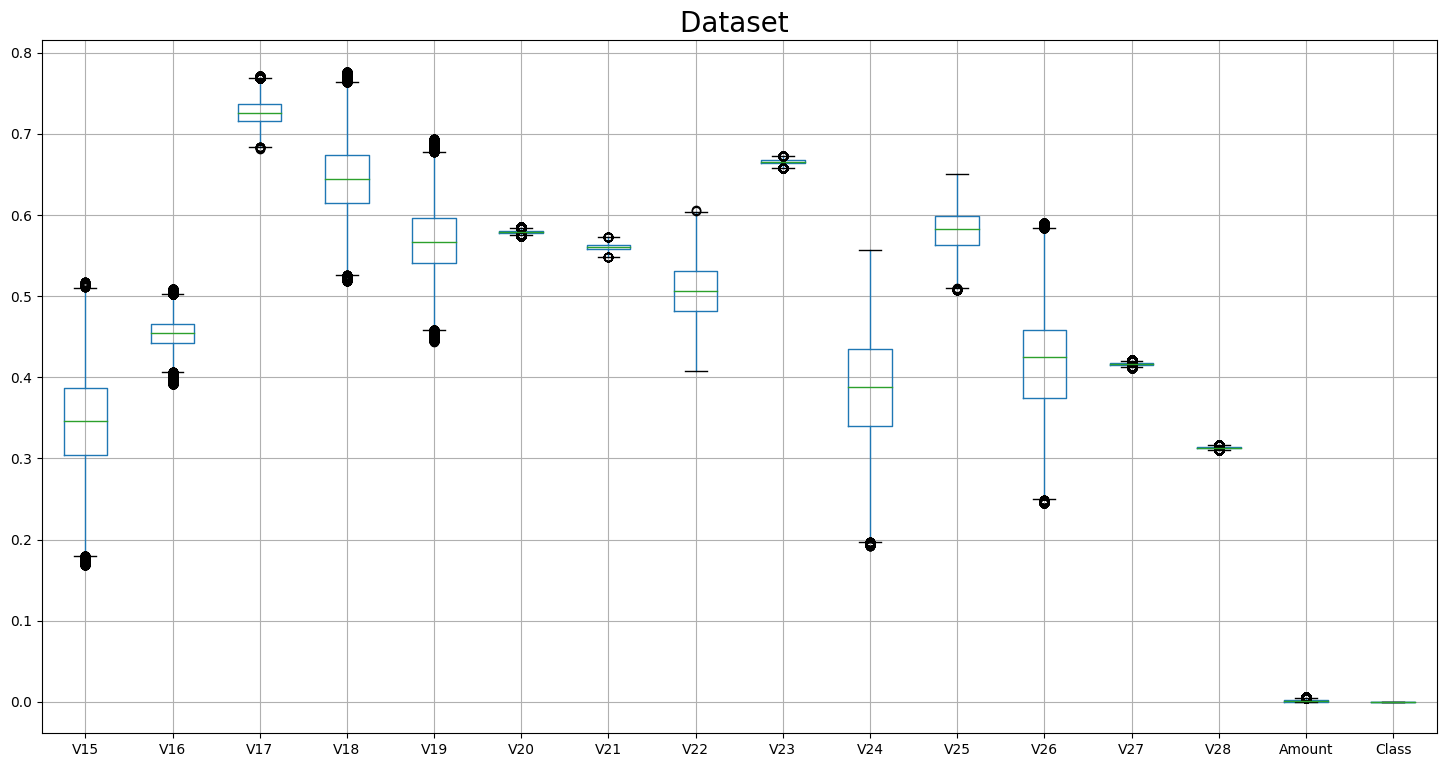

In [ ]:
#results like these
cols = df.columns
plt.figure(figsize=(18,9))
df[cols[15:31]].boxplot()
plt.title("Dataset ", fontsize=20)
plt.show()

In [ ]:
#histograms
def display_histograms(df):


    # Create a figure with subplots for each column
    fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12,4))

    # Loop through each column in the DataFrame and plot a histogram
    for i, column in enumerate(df.columns):
        axes[i].hist(df[column])
        axes[i].set_title(column)

    # Adjust the layout and display the figure
    fig.tight_layout()
    plt.show()

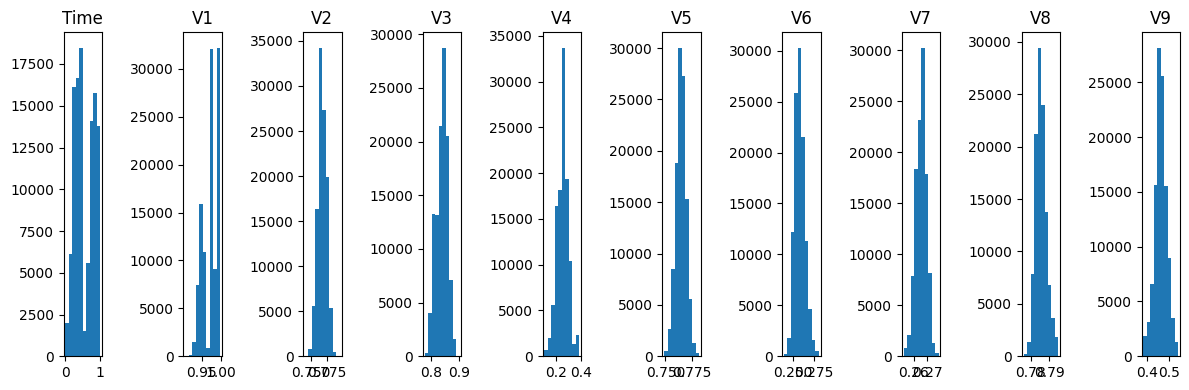

In [ ]:
display_histograms(df[cols[0:10]])

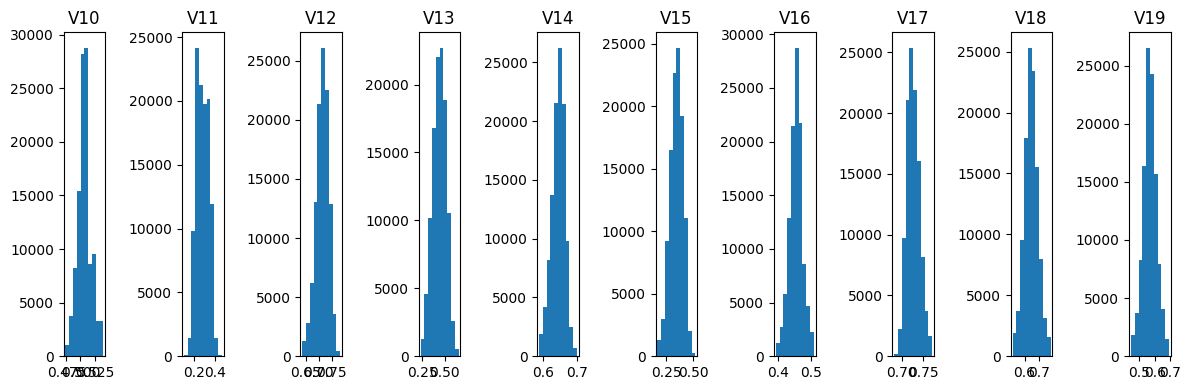

In [ ]:
display_histograms(df[cols[10:20]])

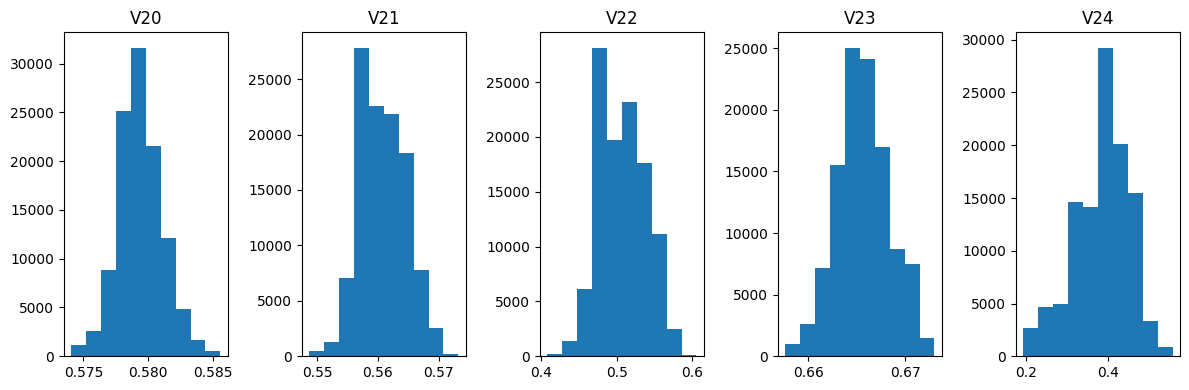

In [ ]:
display_histograms(df[cols[20:25]])

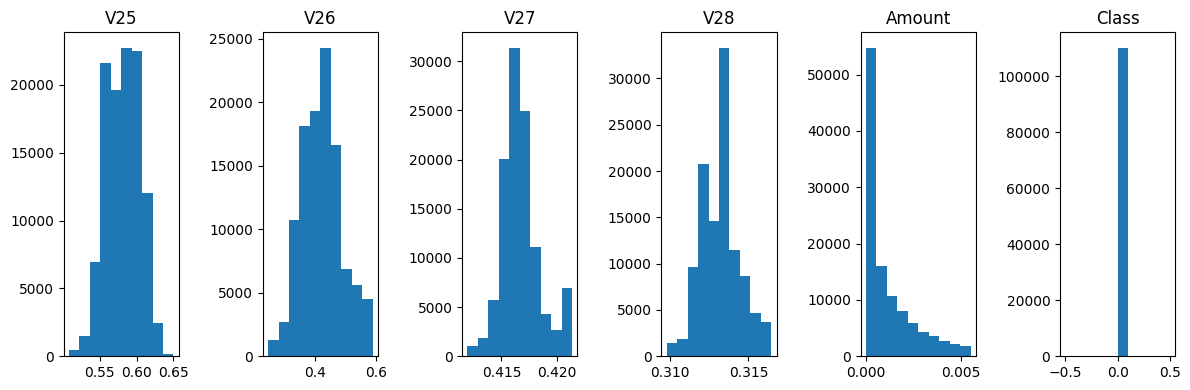

In [ ]:
display_histograms(df[cols[25:31]])

In [ ]:
import seaborn as sns

<Axes: >

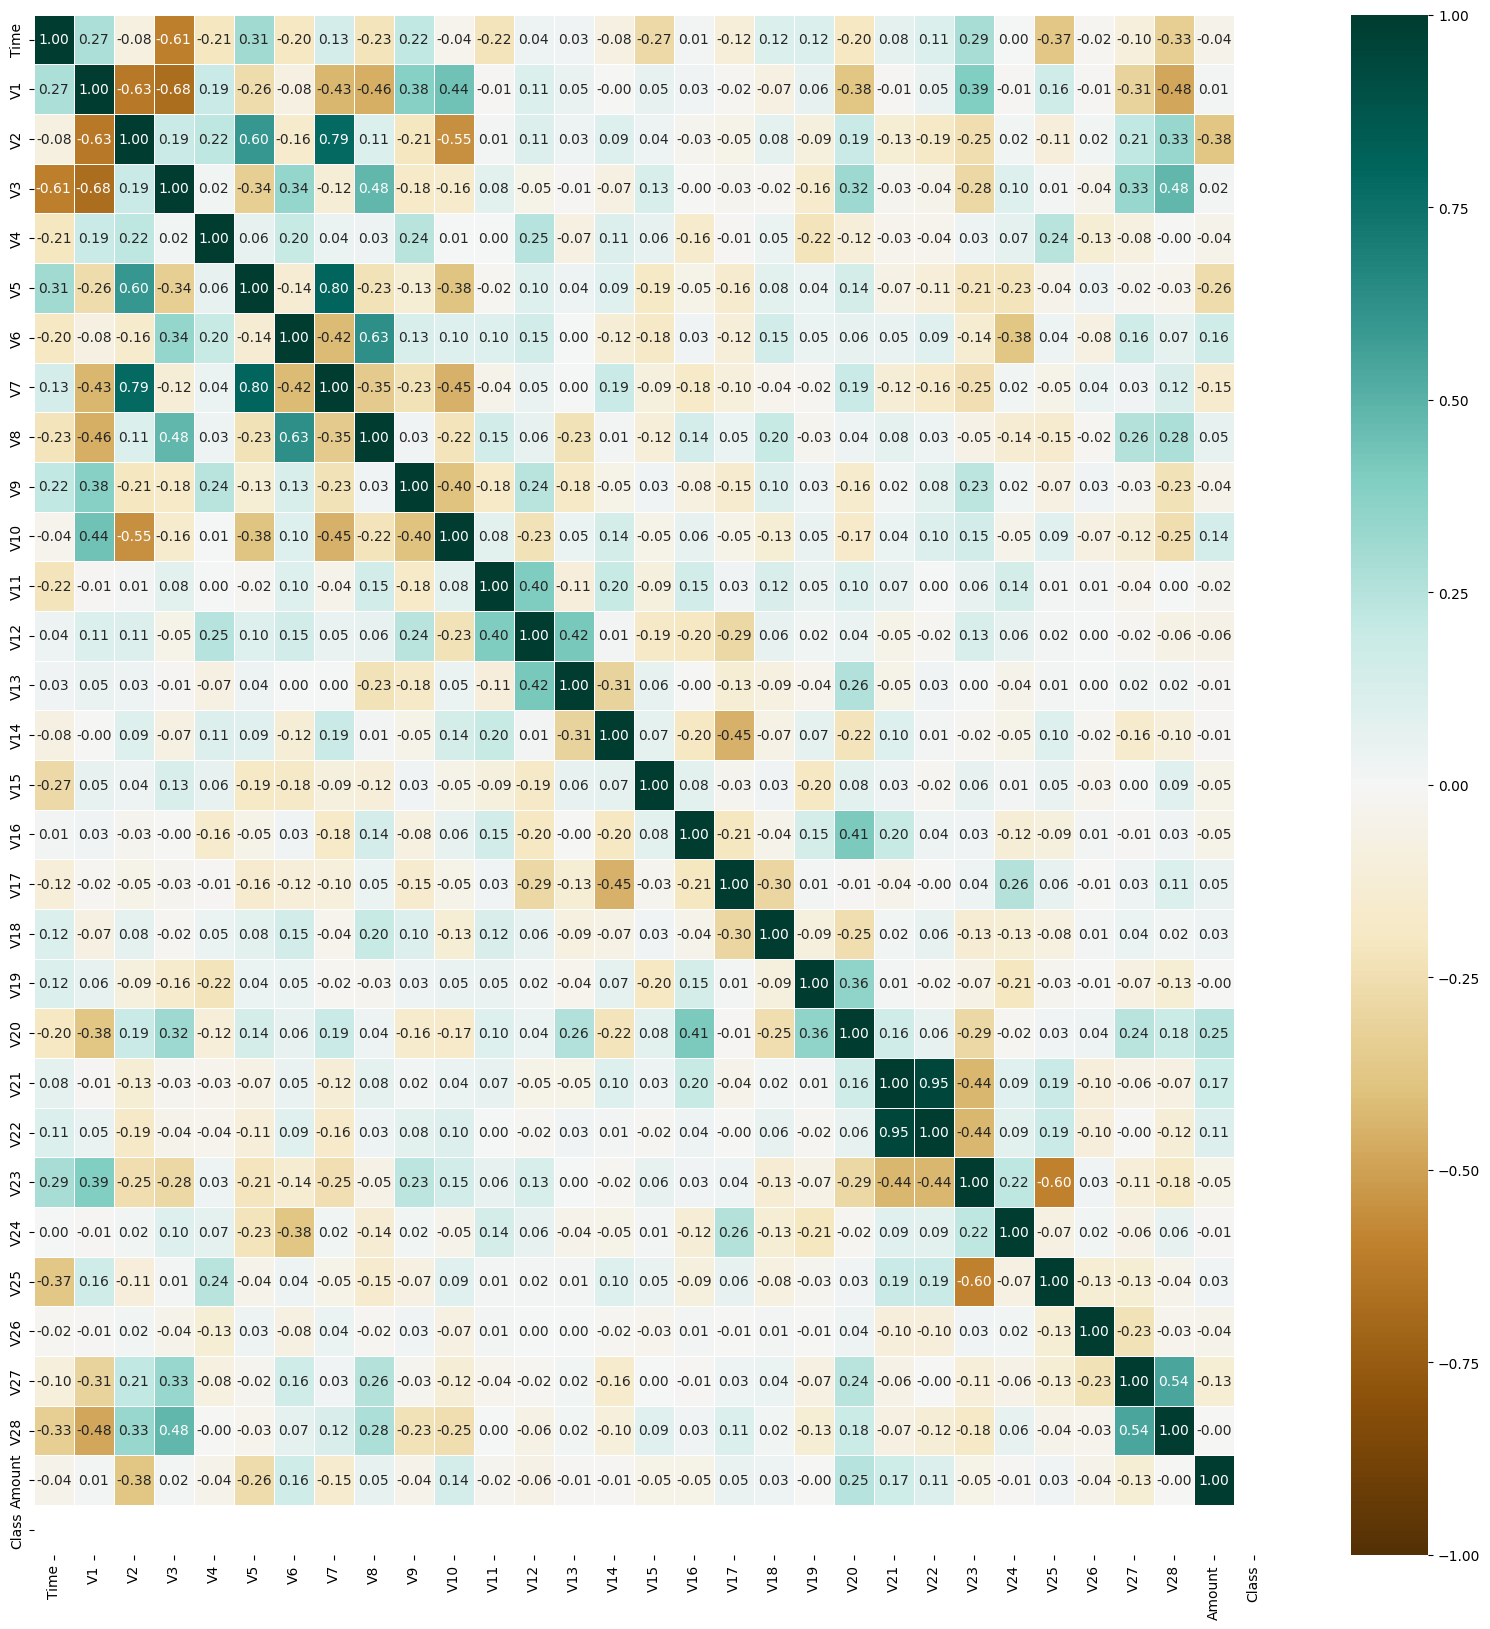

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, ax = ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

In [ ]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [ ]:
# Split into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# RFE feature selection
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

In [ ]:
selected_features

Index(['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

In [ ]:
# SelectKBest feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

In [ ]:
selected_features

Index(['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

Done with Feature selection

In [ ]:
# Count the number of occurrences of each unique value in the 'target_variable' column
value_counts = df['Class'].value_counts()
# Print the value counts
print(value_counts)

0.0    110109
Name: Class, dtype: int64


In [ ]:
np.unique(value_counts)

array([110109])

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

In [ ]:
# Select the first 5000 rows (rows 0, 1, 2, 3, 4,...,4999)
#s_df = df[:5000]
# iloc[row slicing, column slicing]
s_df = df.iloc[:5000, :10]

In [ ]:
# Apply Principle Component Anaylsis for visualizing the data in 2D space.

pca = PCA()
pca_data = pca.fit_transform(s_df)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(s_df.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.588 0.277 0.084 0.035 0.009 0.003 0.001 0.001 0.000 0.000


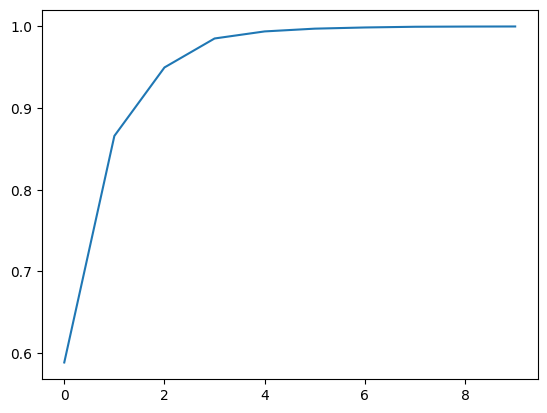

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

#PCA is used to visualize the data

**k-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

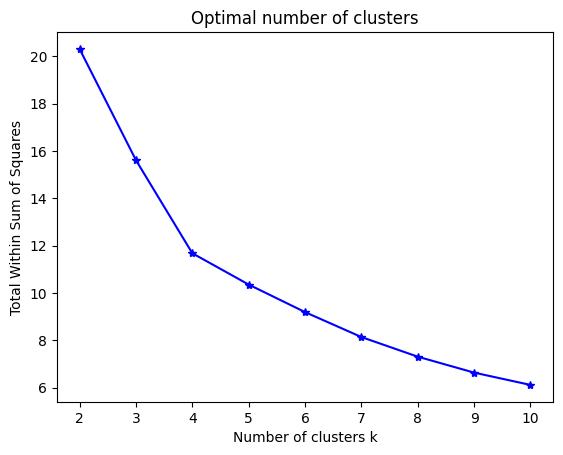

In [ ]:
# Plot within-cluster sum of square.

wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(s_df)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

Compactness of clustering is measured by total within-cluster sum of square, it should be as small as possible.

From the within-cluster sum of square (WSS) graph, it can be said that the optimal number of clusters is 4 because the bend in the knee occurs there.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


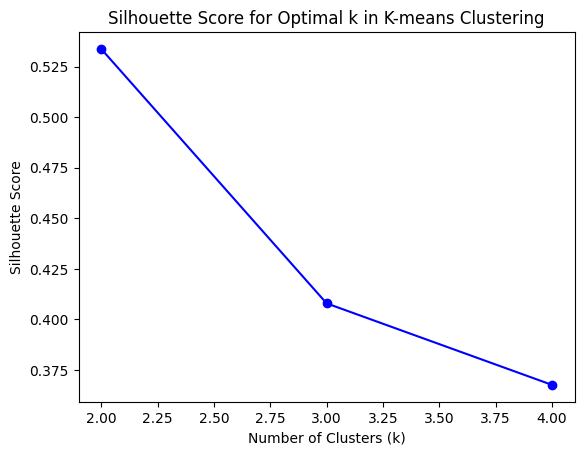

In [ ]:
#def find_optimal_cluster_number_kmeans(df, lower_bound, upper_bound, random_state):
#"Find optimal number of cluster according to silhouette score."
    #silhouette_average = []
    #K = range(lower_bound, upper_bound)
    #for k in K:
        #kmeans = KMeans(n_clusters=k, random_state=random_state)
        #cluster_labels=kmeans.fit_predict(df)
        #silhouette_score = metrics.silhouette_score(df, cluster_labels)
    #silhouette_average.append([k, silhouette_score])
    #silhouette_average = np.array(silhouette_average)
    #print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),"The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])
#new
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Define a range of k values to try
k_values = range(2, 5)

# Loop through different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(s_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(s_df, labels))

# Plot the silhouette scores for different k values
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k in K-means Clustering')
plt.show()


3 is the optimal number of clusters since now!!!!!!!!

In [ ]:
#find_optimal_cluster_number_kmeans(df, 2, 11, random_state=123)

In [ ]:
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Define a range of k values to try
k_values = range(2, 5)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(s_df)
    labels = kmeans.labels_
    score = silhouette_score(s_df, labels)
    silhouette_scores.append(score)
    print(f"k={k}, score={score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, score=0.5337274677332347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, score=0.4079181221278104


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, score=0.3676067209766277


k=2, score=0.5337274677332347

k=3, score=0.4079181221278104

k=4, score=0.3676067209766277

In [ ]:
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Define a range of k values to try
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(s_df)
    labels = kmeans.labels_
    score = silhouette_score(s_df, labels)
    silhouette_scores.append(score)
    print(f"k={k}, score={score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, score=0.5337274677332347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, score=0.4079181221278104


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, score=0.3676067209766277


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, score=0.3603882648263233


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, score=0.34142874605528745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, score=0.35702057334923126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, score=0.3406916272196132


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, score=0.34912710736841596


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10, score=0.356734459096474



*   k=2, score=0.5337274677332347
*   k=3, score=0.4079181221278104
*   k=4, score=0.3676067209766277
*   k=5, score=0.3603882648263233
*   k=6, score=0.34142874605528745
*   k=7, score=0.35702057334923126
*   k=8, score=0.3406916272196132
*   k=9, score=0.34912710736841596
*   k=10, score=0.356734459096474

**Visualize k-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


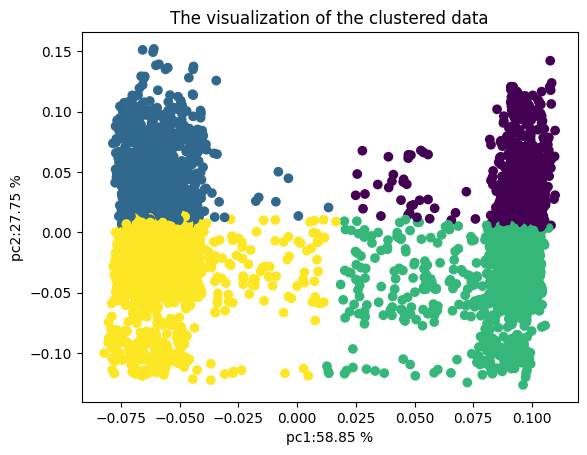

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = s_df.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=4, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

4 clusters are identified by K-means algorithm. The result is plotted in terms of pc1 and pc2.

In [ ]:
#Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(s_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  0.102836 -0.009741
1  0.104153  0.020874
2  0.103355 -0.045636
3  0.103745  0.023801
4  0.100608  0.071301


**Building the clustering model¶**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(s_df)

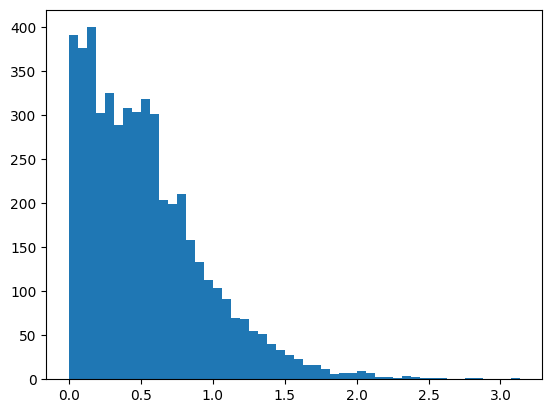

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Compute pairwise distances
neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

# Plot a histogram of distances
distances = np.sort(distances[:,1])
plt.hist(distances, bins=50)
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
# Calculate k-distances
def k_distances(s_df, k=3):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(s_df)
    distances, indices = neigh.kneighbors(s_df)
    return distances[:, -1]
# Plot k-distances
def plot_kdist(distances):
    distances = np.sort(distances, axis=0)
    plt.plot(distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel("Distance")
    plt.show()
# Find optimal epsilon
def find_optimal_epsilon(s_df, k=3):
    distances = k_distances(s_df, k)
    plot_kdist(distances)
    model = DBSCAN(eps=0.5, min_samples=k)
    model.fit(s_df)
    plt.scatter(s_df[:, 0], s_df[:, 1], c=model.labels_)
    plt.show()

In [ ]:
# Numpy array of all the cluster labels assigned to each data point
from sklearn.cluster import KMeans, DBSCAN
dbscan = DBSCAN(eps=0.02, min_samples = 3)

In [ ]:
#clustering.labels_
labels = dbscan.fit_predict(X_principal)

In [ ]:
np.unique(labels)

array([-1,  0])

**Visualizing the clustering**

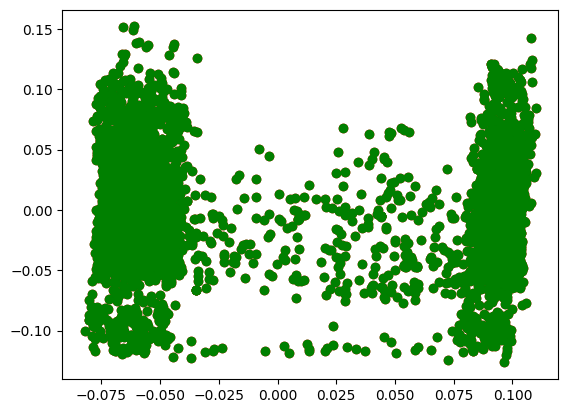

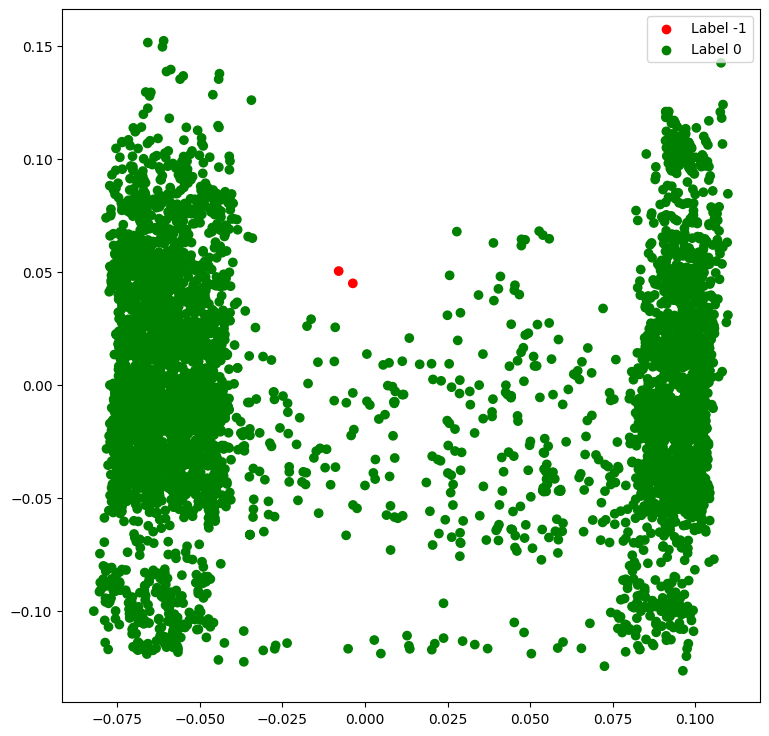

In [ ]:
# Building the label to colour mapping
colours = {}
colours[-1] = 'r'
colours[0] = 'g'
#colours[2] = 'b'
#colours[-1] = 'k'
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
#b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
#k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', #'Label 2', 'Label -1'))
plt.legend((r, g), ('Label -1', 'Label 0' ))
plt.show()

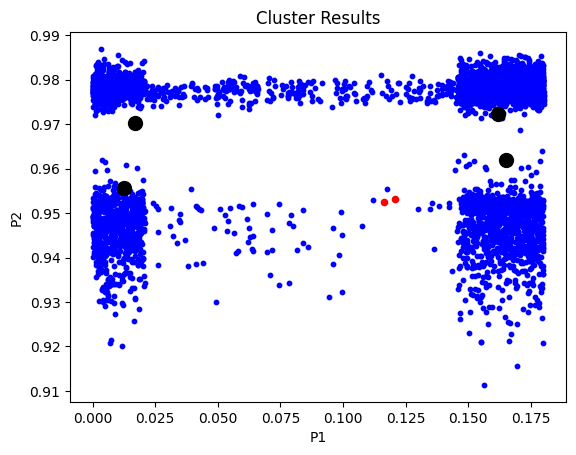

In [ ]:
#new
plt.scatter(s_df.iloc[labels==-1,0], s_df.iloc[labels==-1,1], s=20, c= "red")
plt.scatter(s_df.iloc[labels==0,0], s_df.iloc[labels==0,1], s=10, c= "blue")
#plt.scatter(s_df.iloc[labels==1,0], s_df.iloc[labels==1,1], s=20, c= "green")
#plt.scatter(s_df.iloc[labels==2,0], s_df.iloc[labels==2,1], s=20, c= "yellow")
#plt.scatter(df.iloc[lab==3,0], df.iloc[lab==3,1], s=10, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("P1")
plt.ylabel("P2")
plt.show()

In [ ]:
db = DBSCAN(eps = 0.01, min_samples = 5).fit(X_principal)
labels1 = db.labels_

In [ ]:
labels1

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
np.unique(labels1)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

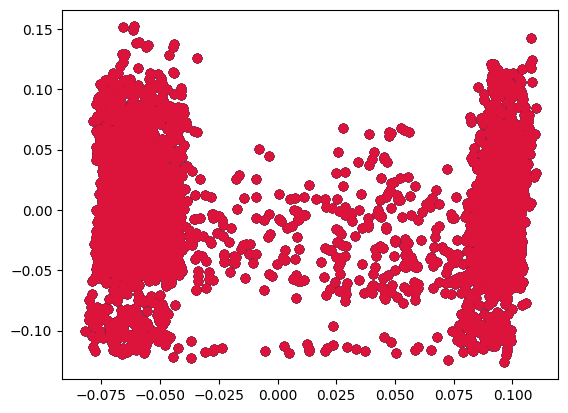

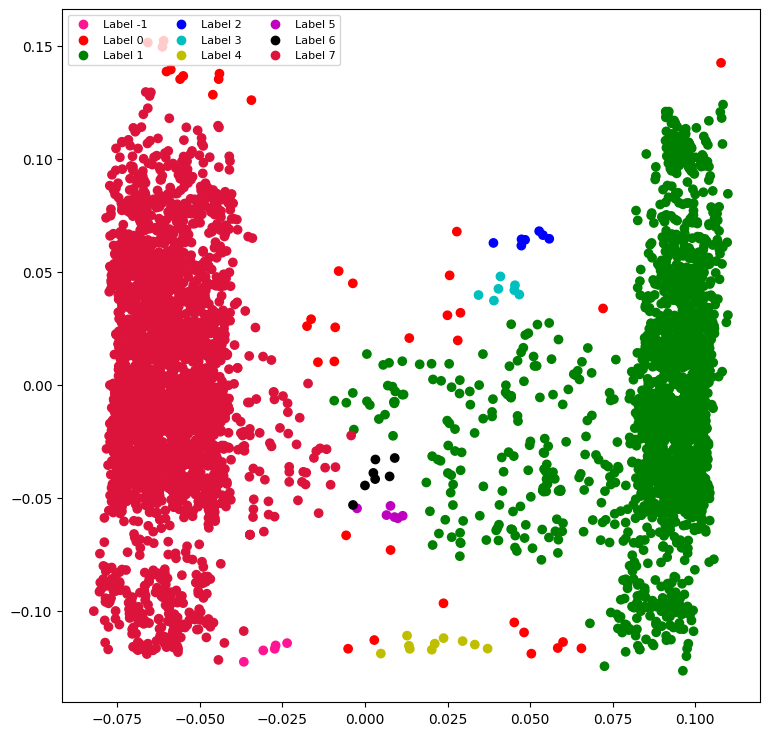

In [ ]:
colours1 = {}
colours1[-1] = 'r'
colours1[0] = 'g'
colours1[1] = 'b'
colours1[2] = 'c'
colours1[3] = 'y'
colours1[4] = 'm'
colours1[5] = 'k'
colours1[6] = 'crimson'
colours1[7] = 'deeppink'
#colours1[8] = 'fuchsia'
#colours1[9] = 'sandybrown'
#colours1[10] = 'salmon'
cvec = [colours1[label] for label in labels1]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k','crimson','deeppink' ]
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[-1])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
crimson = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
deeppink = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[7])
#fuchsia = plt.scatter(
        #X_principal['P1'], X_principal['P2'], marker ='o', color = colors[8])
#sandybrown = plt.scatter(
        #X_principal['P1'], X_principal['P2'], marker ='o', color = colors[9])
#salmon = plt.scatter(
        #X_principal['P1'], X_principal['P2'], marker ='o', color = colors[10])
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k, crimson, deeppink),
           ('Label -1', 'Label 0', 'Label 1', 'Label 2','Label 3',
            'Label 4', 'Label 5','Label 6', 'Label 7'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

In [ ]:
db = DBSCAN(eps = 0.01, min_samples = 3).fit(X_principal)
labels2 = db.labels_

In [ ]:
labels2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(labels2)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

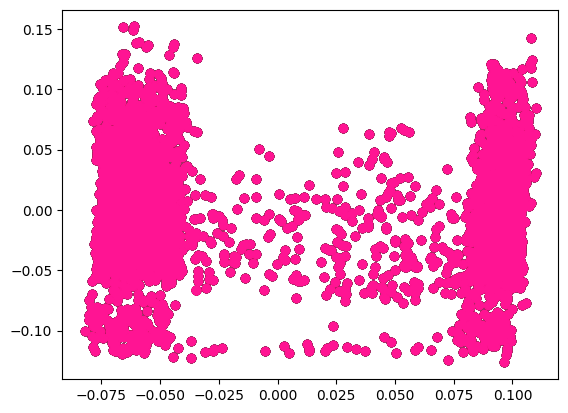

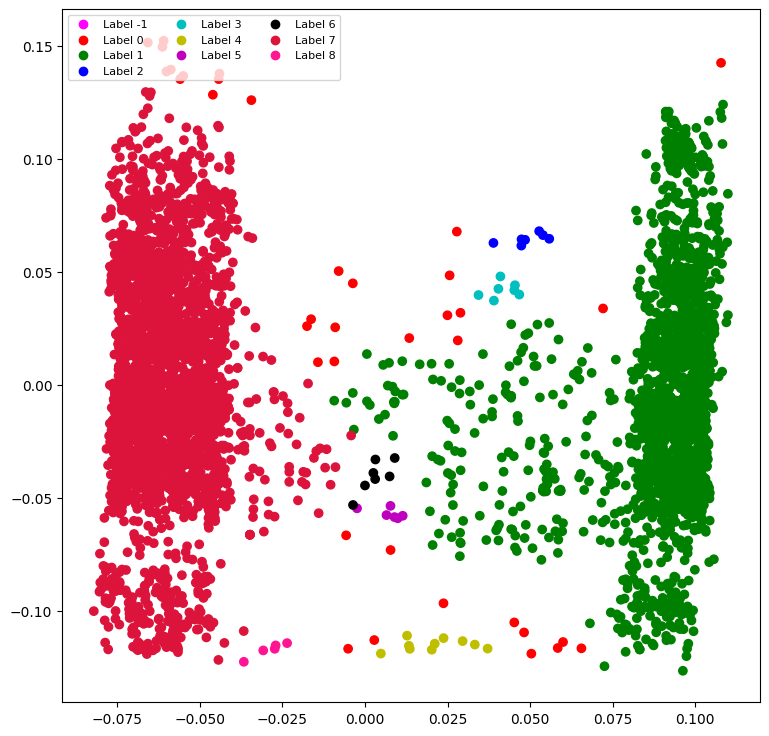

In [ ]:
colours2 = {}
colours2[-1] = 'r'
colours2[0] = 'g'
colours2[1] = 'b'
colours2[2] = 'c'
colours2[3] = 'y'
colours2[4] = 'm'
colours2[5] = 'k'
colours2[6] = 'crimson'
colours2[7] = 'deeppink'
colours2[8] = 'fuchsia'
#colours1[9] = 'sandybrown'
#colours1[10] = 'salmon'
cvec = [colours2[label] for label in labels1]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k','crimson','deeppink','fuchsia' ]
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[-1])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
crimson = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
deeppink = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[7])
fuchsia = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[8])
#sandybrown = plt.scatter(
        #X_principal['P1'], X_principal['P2'], marker ='o', color = colors[9])
#salmon = plt.scatter(
        #X_principal['P1'], X_principal['P2'], marker ='o', color = colors[10])
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k, crimson, deeppink, fuchsia),
           ('Label -1', 'Label 0', 'Label 1', 'Label 2','Label 3',
            'Label 4', 'Label 5','Label 6', 'Label 7', 'Label 8'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

**ELBOW METHOD**

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(s_df)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Plot the Elbow graph to find the optimum number of cluster**

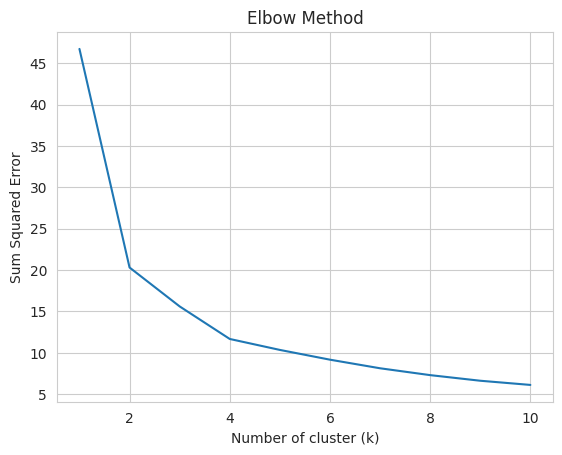

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

From the above graph, we can observe that at k=2 and k=4 elbow-like situation. So, we are considering K=4

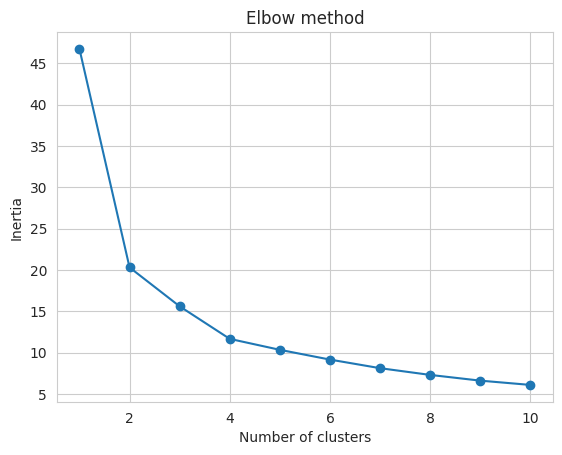

In [ ]:
# Define a range of hyperparameters to test
n_clusters = range(1, 11)
inertias = []

# Fine-tune the elbow method
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(s_df)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.plot(n_clusters, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()


**DAVIES BOULDIN INDEX**

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=30)
labels = kmeans.fit_predict(s_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_index = davies_bouldin_score(s_df, labels)
print(db_index)


1.050467820002447


The lower the Davies-Bouldin Index, the better the clustering quality. Score of 0 indicating a perfect clustering result.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(s_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_index = davies_bouldin_score(s_df, labels)
print(db_index)


0.9216152446223326


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=30)
labels = kmeans.fit_predict(s_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_index = davies_bouldin_score(s_df, labels)
print(db_index)

0.7717266172258624


In [ ]:
# Define a range of hyperparameters to test
n_clusters = range(2, 10)
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Fine-tune the DBI
best_score = float('inf')
best_params = {}
for n in n_clusters:
    for metric in distance_metrics:
        if metric == 'precomputed':
            distances = pairwise_distances(s_df, metric='euclidean')
            kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
            kmeans.fit(distances)
        else:
            kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
            kmeans.fit(s_df)
        labels = kmeans.labels_
        score = davies_bouldin_score(s_df, labels)
        if score < best_score:
            best_score = score
            best_params = {'n_clusters': n, 'distance_metric': metric}

# Print the best hyperparameters and DBI score
print('Best hyperparameters:', best_params)
print('Best DBI score:', best_score)


Best hyperparameters: {'n_clusters': 2, 'distance_metric': 'euclidean'}
Best DBI score: 0.7717266172258624


**POINT TO PONDER**

As we can see/observe from above results that davies bouldin score gives better result with small number of clusters in this dataset as compared to other large number of clusters.

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(s_df)
    db_index = davies_bouldin_score(s_df, labels)
    results.update({i: db_index})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

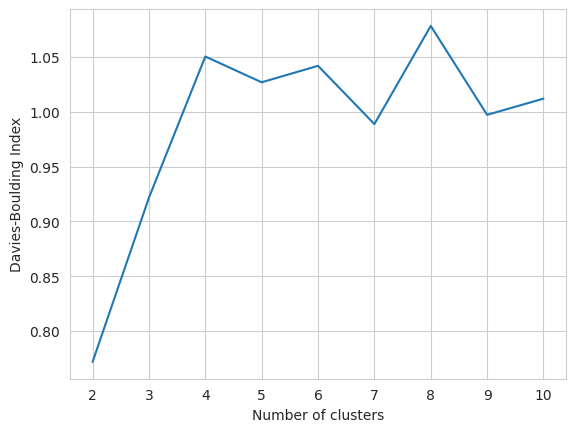

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

While in this example the measures are very close to each other, we can still observe that choosing 2 clusters minimizes the similarity measure.

Higher Silhouette Score, lower WCSS at the elbow point, and lower Davies-Bouldin Index indicate better clustering performance. Consider the specific characteristics of your data and the goals of your analysis to determine the optimal number of clusters or the best-performing clustering algorithm.

**The average silhouette_score is : 0.41**

**Davien-Bouldin Index is 0.7717266172258624**

**SSE is 2,20**

**cluster = 4 with WCSS**

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(s_df)
distances, indices = nbrs.kneighbors(s_df)

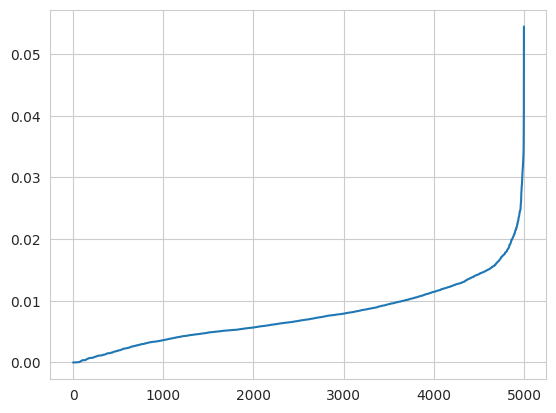

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We train our model, selecting 0.02 for eps and setting min_samples to 4.

In [ ]:
m = DBSCAN(eps=0.02, min_samples=4)
m.fit(s_df)

DBSCAN(eps=0.02, min_samples=4)

In [ ]:
# create DBSCAN clustering model
model = DBSCAN(eps=0.02, min_samples=4)

# fit the model
model.fit(s_df)

# evaluate clustering performance using silhouette score
silhouette = silhouette_score(s_df, model.labels_)
print(f"Silhouette Score: {silhouette}")

# evaluate clustering performance using Davies-Bouldin Index
db_index = davies_bouldin_score(s_df, model.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: -0.22309364067824816
Davies-Bouldin Index: 1.4870504019455026
